Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [48]:
data_w = data.resample('w').apply('sum')

data_w.iloc[:,1:] = data_w.iloc[:,1:] // (24 * 7)
# data_w.drop(['dayofmonth'],axis=0,inplace=True)
# data_w.drop(data_w.index[-1],axis=0,inplace=True)
data_w

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,4632079.0,1704,0,2,0,2,0,2,9,0,0,0
2002-01-13,5289881.0,2002,1,10,1,10,2,3,11,0,0,0
2002-01-20,5284084.0,2002,1,17,1,17,3,3,11,0,0,0
2002-01-27,5063777.0,2002,1,24,1,24,4,3,11,0,0,0
2002-02-03,4905010.0,2002,1,17,1,31,5,3,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,6461277.0,2018,7,5,3,186,27,3,11,0,0,0
2018-07-15,6118566.0,2018,7,12,3,193,28,3,11,0,0,0
2018-07-22,5982832.0,2018,7,19,3,200,29,3,11,0,0,0


In [49]:
data_w.drop(columns=['is_next_holiday', 
                     'is_holiday', 
                     'is_prev_holiday', 
                     'hour', 
                     'dayofweek', 
                     'dayofyear', 'dayofmonth'], inplace=True)
# data_w.drop(['2002-01-06'], inplace=True)
data_w = data_w[1:-1]
data_w

,PJME_MW,year,month,quarter,weekofyear
Date,,,,,
2002-01-13,5289881.0,2002,1,1,2
2002-01-20,5284084.0,2002,1,1,3
2002-01-27,5063777.0,2002,1,1,4
2002-02-03,4905010.0,2002,1,1,5
2002-02-10,5233287.0,2002,2,1,6
...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26
2018-07-08,6461277.0,2018,7,3,27
2018-07-15,6118566.0,2018,7,3,28


Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

In [50]:
data_w.loc[data_w['PJME_MW'].isna() == 1 ,:]

,PJME_MW,year,month,quarter,weekofyear
Date,,,,,


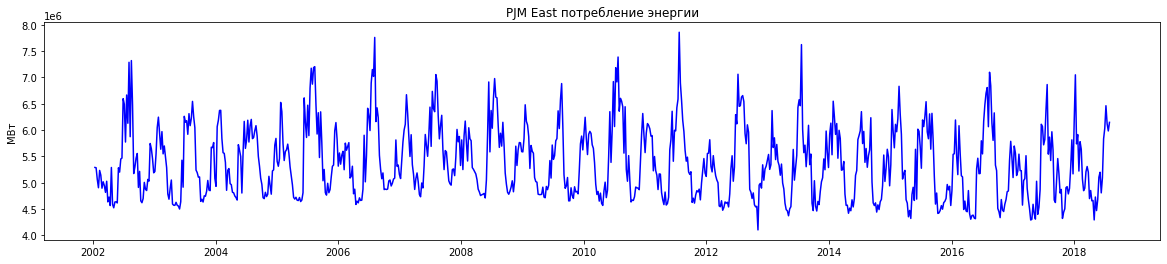

In [51]:
plt.figure(figsize =(20,4))
plt.plot(data_w['PJME_MW'].index, data_w['PJME_MW'].values, color='b' )  #.get_level_values('Date')
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [52]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)
pca_ =PCA(n_components=2)

X = data_w.iloc[:,:].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)
X_p = pca_.fit_transform(Xscale)

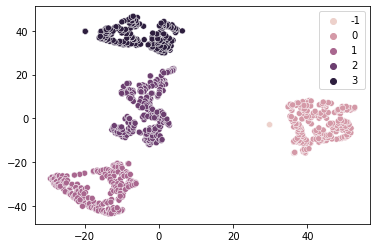

In [53]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(x=X_t[:,0], y=X_t[:,1], hue=X_clast)
plt.show()

In [55]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  2
Число кластеров в календаре:  5


In [56]:
data_w['day_week_month'] = X_clast
# data_d.iloc[np.where(data_d['day_week_month']==0)[0]].iloc[:10,:]
data_w

<ipython-input-56-ca069684e9f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['day_week_month'] = X_clast


,PJME_MW,year,month,quarter,weekofyear,day_week_month
Date,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0
2002-01-20,5284084.0,2002,1,1,3,0
2002-01-27,5063777.0,2002,1,1,4,0
2002-02-03,4905010.0,2002,1,1,5,0
2002-02-10,5233287.0,2002,2,1,6,0
...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1
2018-07-08,6461277.0,2018,7,3,27,2
2018-07-15,6118566.0,2018,7,3,28,2


In [68]:
data_w.iloc[np.where(data_w['day_week_month']==3)[0]]

,PJME_MW,year,month,quarter,weekofyear,day_week_month
Date,,,,,,
2002-10-13,4656053.0,2002,10,4,41,3
2002-10-20,4620811.0,2002,10,4,42,3
2002-11-03,5006374.0,2002,10,4,44,3
2002-11-10,4875037.0,2002,11,4,45,3
2002-11-17,4852157.0,2002,11,4,46,3
...,...,...,...,...,...,...
2017-12-03,4892365.0,2017,11,4,48,3
2017-12-10,5283147.0,2017,12,4,49,3
2017-12-17,5814027.0,2017,12,4,50,3


Судя по всему новый признак повторяет квартал. получился бесполезным.

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:-1])
Xpca.shape

(864, 2)

In [71]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]

<ipython-input-71-c0504e955a9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['pca1']=Xpca[:,0]
<ipython-input-71-c0504e955a9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['pca2']=Xpca[:,1]


In [73]:
data_w

,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2
Date,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352
...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332


In [74]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0.0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff
data_w

<ipython-input-74-32ff78266b78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['diff1'] = 0.0
<ipython-input-74-32ff78266b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['diff1'] =  data_w['diff1'].astype('float')


,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1
Date,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0
...,...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606,201632.0
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332,428088.0
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332,-342711.0


In [75]:
first_diff_d =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0.0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')
data_w

<ipython-input-75-abc972e99419>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['diff1_d'] = 0.0
<ipython-input-75-abc972e99419>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['diff1_d'] =  data_w['diff1_d'].astype('float')


,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1,diff1_d
Date,,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0,0.000000
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0,-0.001097
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0,-0.043506
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0,-0.032368
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0,0.062729
...,...,...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606,201632.0,0.033420
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332,428088.0,0.066254
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332,-342711.0,-0.056012


In [76]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l
data_w

<ipython-input-76-df867d71024c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['diff1_l'] = 0
<ipython-input-76-df867d71024c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['diff1_l'] =  data_w['diff1_l'].astype('float')


,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l
Date,,,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0,0.000000,0.000000
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0,-0.001097,15.480210
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0,-0.043506,15.437623
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0,-0.032368,15.405768
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0,0.062729,15.470550
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606,201632.0,0.033420,15.612786
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332,428088.0,0.066254,15.681338
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332,-342711.0,-0.056012,15.626838


In [78]:
data_w['diff1_l'].describe()

count    864.000000
mean      15.474350
std        0.540819
min        0.000000
25%       15.391287
50%       15.478083
75%       15.580866
max       15.876779
Name: diff1_l, dtype: float64

так же бесполезный признак

In [79]:
data_w['d_m4']=data_w['PJME_MW'].rolling(window=4).mean()
data_w

<ipython-input-79-742711ee28bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['d_m4']=data_w['PJME_MW'].rolling(window=4).mean()


,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_m4
Date,,,,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0,0.000000,0.000000,NaN
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0,-0.001097,15.480210,NaN
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0,-0.043506,15.437623,NaN
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0,-0.032368,15.405768,5135688.00
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0,0.062729,15.470550,5121539.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606,201632.0,0.033420,15.612786,5441334.50
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332,428088.0,0.066254,15.681338,5854817.25
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332,-342711.0,-0.056012,15.626838,6111147.25


In [81]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)

<ipython-input-81-4d947b77c0e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)


In [82]:
data_w

,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_m4,exp_0_05
Date,,,,,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0,0.000000,0.000000,NaN,5.289881e+06
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0,-0.001097,15.480210,NaN,5.289591e+06
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0,-0.043506,15.437623,NaN,5.278300e+06
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0,-0.032368,15.405768,5135688.00,5.259636e+06
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0,0.062729,15.470550,5121539.50,5.258318e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606,201632.0,0.033420,15.612786,5441334.50,5.147068e+06
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332,428088.0,0.066254,15.681338,5854817.25,5.212779e+06
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332,-342711.0,-0.056012,15.626838,6111147.25,5.258068e+06


In [84]:
data_w['exp_0_05'].describe()

count    8.640000e+02
mean     5.387144e+06
std      1.891170e+05
min      4.904050e+06
25%      5.258168e+06
50%      5.373757e+06
75%      5.518654e+06
max      5.847833e+06
Name: exp_0_05, dtype: float64

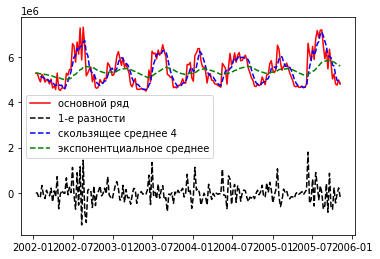

In [86]:
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['d_m4'][:N100],'--b',label ='скользящее среднее 4')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

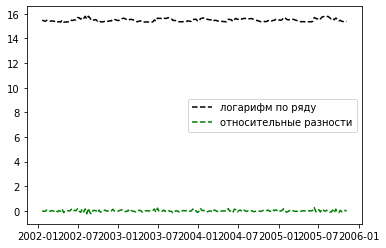

In [87]:
N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')
plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

In [21]:
scl_target=StandardScaler() 
p = 8
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(857, 1)

<ipython-input-88-40bd5f15089c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
<ipython-input-88-40bd5f15089c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
<ipython-input-88-40bd5f15089c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

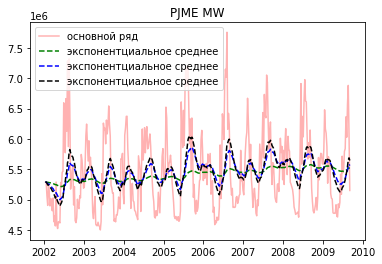

In [88]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [94]:
data_w.iloc[:3, 11] = 0
data_w

c:\users\ifl\documents\github\ml-in-business\.venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_m4,exp_0_05,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08
Date,,,,,,,,,,,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0,0.000000,0.000000,0.00,5.289881e+06,5.289881e+06,5.289881e+06,5.289881e+06,5.289881e+06,5.289881e+06,5.289881e+06
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0,-0.001097,15.480210,0.00,5.289591e+06,5.289823e+06,5.289707e+06,5.289649e+06,5.289533e+06,5.289475e+06,5.289417e+06
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0,-0.043506,15.437623,0.00,5.278300e+06,5.287563e+06,5.282929e+06,5.280614e+06,5.275988e+06,5.273676e+06,5.271366e+06
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0,-0.032368,15.405768,5135688.00,5.259636e+06,5.283737e+06,5.271592e+06,5.265590e+06,5.253729e+06,5.247870e+06,5.242058e+06
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0,0.062729,15.470550,5121539.50,5.258318e+06,5.283233e+06,5.270442e+06,5.264298e+06,5.252503e+06,5.246849e+06,5.241356e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,6033189.0,2018,6,2,26,1,0.305282,1.487606,201632.0,0.033420,15.612786,5441334.50,5.147068e+06,5.221091e+06,5.164932e+06,5.154535e+06,5.142048e+06,5.139506e+06,5.139500e+06
2018-07-08,6461277.0,2018,7,3,27,2,-0.542836,1.484332,428088.0,0.066254,15.681338,5854817.25,5.212779e+06,5.233493e+06,5.203822e+06,5.206805e+06,5.221202e+06,5.232030e+06,5.245242e+06
2018-07-15,6118566.0,2018,7,3,28,2,-0.542836,1.484332,-342711.0,-0.056012,15.626838,6111147.25,5.258068e+06,5.242343e+06,5.231264e+06,5.243275e+06,5.275044e+06,5.294088e+06,5.315108e+06


In [95]:
p = 8
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

<ipython-input-95-f66c7307a0c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['t'+str(p-i)]=0


In [96]:
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

<ipython-input-96-f6a40af64162>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['d'+str(p-i)]=0


In [98]:
data_w.head(20)

,PJME_MW,year,month,quarter,weekofyear,day_week_month,pca1,pca2,diff1,diff1_d,...,t2,t1,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-13,5289881.0,2002,1,1,2,0,2.050602,-1.274200,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,5284084.0,2002,1,1,3,0,2.050602,-1.274200,-5797.0,-0.001097,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,5063777.0,2002,1,1,4,0,2.050602,-1.274200,-220307.0,-0.043506,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,4905010.0,2002,1,1,5,0,2.050602,-1.274200,-158767.0,-0.032368,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,5233287.0,2002,2,1,6,0,1.841895,-1.286352,328277.0,0.062729,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,5143583.0,2002,2,1,7,0,1.841895,-1.286352,-89704.0,-0.017440,...,0,0,0,0,0,0,0,0,0,0
2002-02-24,4896214.0,2002,2,1,8,0,1.841895,-1.286352,-247369.0,-0.050523,...,0,0,0,0,0,0,0,0,0,0
2002-03-03,5017994.0,2002,2,1,9,0,1.841895,-1.286352,121780.0,0.024269,...,0,0,0,0,0,0,0,0,0,0
2002-03-10,4946073.0,2002,3,1,10,0,1.633188,-1.298503,-71921.0,-0.014541,...,4896214,5017994,0,-5797,-220307,-158767,328277,-89704,-247369,121780


In [99]:
scl_target=StandardScaler() 

h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(855, 1)

In [101]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(855, 35)

In [103]:
X #X[:7,14]=0

array([[-0.66114951, -1.34394598, -0.99895124, ..., -0.20913674,
        -0.57401089,  0.27749074],
       [-0.85336258, -1.34394598, -0.99895124, ..., -0.5729243 ,
         0.27728237, -0.16912396],
       [-0.53939094, -1.34394598, -0.99895124, ...,  0.27882982,
        -0.16941085, -0.30083657],
       ...,
       [ 1.59573568,  1.48454341,  0.18771539, ...,  0.65751129,
         1.69906243,  0.46160479],
       [ 1.08527017,  1.48454341,  0.18771539, ...,  1.70137958,
         0.4614288 ,  0.9837424 ],
       [ 0.88309538,  1.48454341,  0.18771539, ...,  0.46307594,
         0.98365822, -0.79348208]])

In [104]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.97,  I=0
F-test=0.00,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.00,  I=7
F-test=0.02,  I=8
F-test=0.01,  I=9
F-test=1.00,  I=10
F-test=0.58,  I=11
F-test=0.02,  I=12
F-test=0.01,  I=13
F-test=0.01,  I=14
F-test=0.02,  I=15
F-test=0.03,  I=16
F-test=0.04,  I=17
F-test=0.05,  I=18
F-test=0.06,  I=19
F-test=0.01,  I=20
F-test=0.00,  I=21
F-test=0.02,  I=22
F-test=0.07,  I=23
F-test=0.15,  I=24
F-test=0.30,  I=25
F-test=0.51,  I=26
F-test=0.02,  I=27
F-test=0.03,  I=28
F-test=0.04,  I=29
F-test=0.04,  I=30
F-test=0.04,  I=31
F-test=0.03,  I=32
F-test=0.02,  I=33
F-test=0.02,  I=34


In [105]:
sfk =SelectKBest(f_regression, k=7)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(855, 7)

In [107]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 'd_m4', 't4', 't3', 't2', 't1'], dtype='object')

In [108]:
sfp=SelectPercentile(f_regression, percentile=20)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(855, 7)

In [110]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 'd_m4', 't4', 't3', 't2', 't1'], dtype='object')

In [111]:
gr_model = GradientBoostingRegressor(max_depth=5, n_estimators=10).fit(X, y.ravel())


sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(855, 3)

In [112]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 10 11 23 24 25 26]
Номера признаков лучших признаков по процентной форме:  [ 0 10 11 23 24 25 26]
Номера признаков для выбора по модели :  [ 0 10 19]


In [129]:
list_par = list(set(list(list_param_k) + list(list_param_p) + list(list_param_m)))

In [131]:
list_par
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'diff1_l', 'd_m4', 't8', 't4', 't3', 't2', 't1'], dtype='object')

In [132]:
from sklearn.linear_model import LinearRegression 

In [133]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

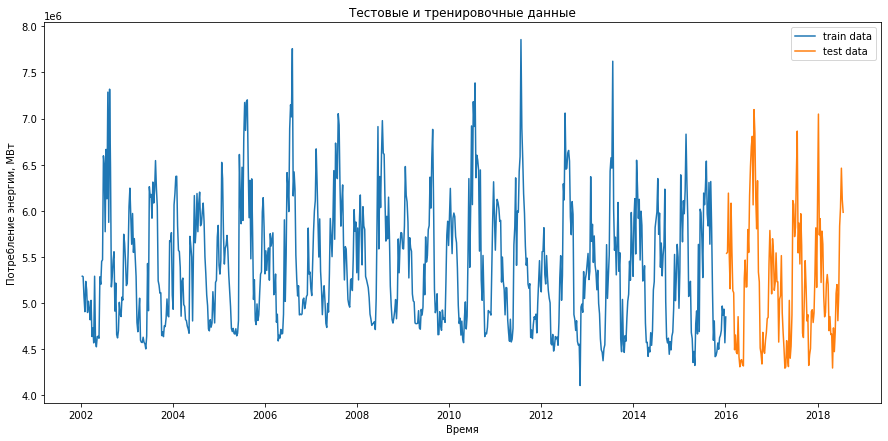

In [134]:
train, test = split_data( data_w.iloc[:-1,:], '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [135]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:-1,:]
y_test =y[train.shape[0]:-1,0]

In [136]:
train.shape

(730, 35)

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

In [138]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [139]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(max_depth=5, random_state=0)

In [140]:
X_test.shape

(124, 8)

In [141]:
y_test_pred_g = model_g.predict(X_test)

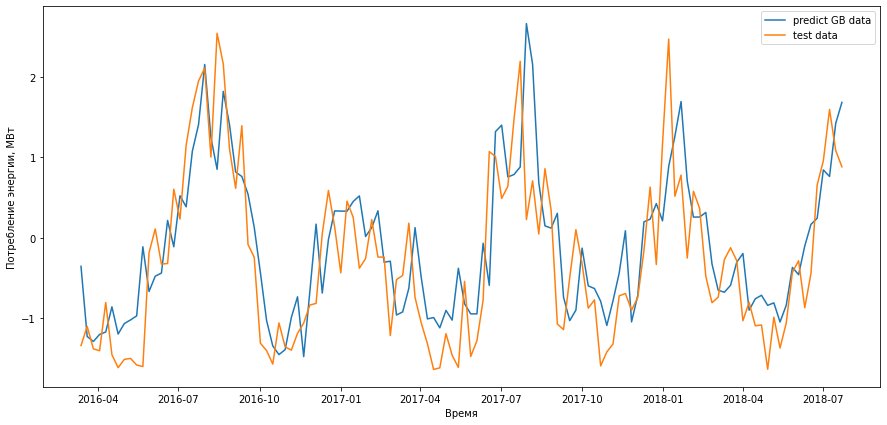

In [142]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [144]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.4502086002080978 
ошибка mae  :   0.5393002483257263 
оценка R2 :   0.5748786094386426


In [145]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [146]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.963452174487525 %


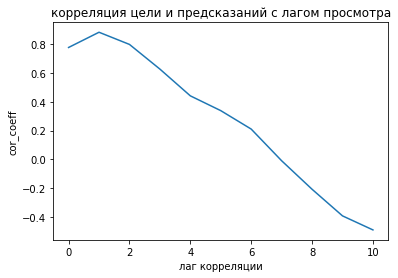

In [147]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

In [159]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [1, 2, 3, 4, 5, 6, 10], 
              "n_estimators":[10, 20, 30, 50, 100, 200, 300]}

#  randomized search
n_iter_search = 150

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

c:\users\ifl\documents\github\ml-in-business\.venv\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 49 is smaller than n_iter=150. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model with rank: 1
Mean validation score: 0.669 (std: 0.060)
Parameters: {'n_estimators': 100, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.668 (std: 0.058)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 3
Mean validation score: 0.667 (std: 0.060)
Parameters: {'n_estimators': 50, 'max_depth': 2}



c:\users\ifl\documents\github\ml-in-business\.venv\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [155]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.858756734863569 %


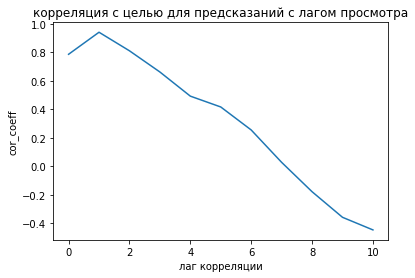

In [156]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью для предсказаний с лагом просмотра')
plt.show()

у GBR было даже лучше ошибка...
В целом предсказание плохое, предсказываем следующее значение как изменение текущего.

In [165]:
X_test.shape

(124, 8)

In [167]:
data_w.columns[list_par]

Index(['PJME_MW', 'diff1_l', 'd_m4', 't8', 't4', 't3', 't2', 't1'], dtype='object')

In [161]:
X_test_100 = X_test.copy()
y_test_100 = y_test.copy()
N10 = 30+p
for i in range(p,N10+p):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
    #строим 'exp_0_07', 'exp_0_08'
#     X_test_100[i+1,6] = X_test_100[i,6]*(1-0.06)+ 0.06 * X_test_100[i+1,0] 
#     X_test_100[i+1,5] = X_test_100[i,5]*(1-0.05)+ 0.05 * X_test_100[i+1,0] 
#     X_test_100[i+1,7] = X_test_100[i,7]*(1-0.07)+ 0.07 * X_test_100[i+1,0]
#     X_test_100[i+1,8] = X_test_100[i,8]*(1-0.08)+ 0.08 * X_test_100[i+1,0]
    #строим 'd_w7' - признак под номером 3
    X_test_100[i+1,3] = np.mean(X_test_100[i-6:i+1,0]) 
    #строим 'diff1_l' - признак под номером 1
    # строим логарифм по значению ряда и скалируем признак по схеме 16-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[16])*scl_x.scale_[16]
    #устанавливаем новое значение для 1
    X_test_100[i+1,1] = xy_i 
    # обновим историю значенний
    X_test_100[i+1,9] = X_test_100[i-6,0]
    
    X_test_100[i+1,10] = X_test_100[i-1,0]
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[p],y_test[p-1], 'og', alpha=1)
plt.xticks(rotation='90')
plt.legend()
plt.show()    

IndexError: index 9 is out of bounds for axis 1 with size 8

всё) тут мозг вскипел) 